## Supply Chain Management

   A Fast Moving Consumer Goods (FMCG) company entered into the instant noodles business two
years back. Their higher management has noticed that there is a mismatch in the demand and
supply. Where the demand is high, supply is pretty low and vice-versa which results in a loss in
inventory cost and ultimately loss to the company. Hence, the higher management wants to
optimize the supply quantity in each and every warehouse in the entire country.

GOAL:
 The objective of this exercise is to build a model, using historical data that will determine an
optimum weight of the product to be shipped each time from the respective warehouse.


In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
# Loading test dataset
df=pd.read_csv('supply_test.csv')
df

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,8,1,3,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
5525,22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,3,1,3,...,0,170,NaN,NaN,26,0,C,5,9,33108
5526,22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,7,2,2,...,0,99,22.0,NaN,20,0,B+,6,4,24072
5527,22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,6,2,4,...,0,220,17.0,NaN,13,0,B,3,28,15055


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5529 non-null   int64  
 1   Ware_house_ID                 5529 non-null   object 
 2   WH_Manager_ID                 5529 non-null   object 
 3   Location_type                 5529 non-null   object 
 4   WH_capacity_size              5529 non-null   object 
 5   zone                          5529 non-null   object 
 6   WH_regional_zone              5529 non-null   object 
 7   num_refill_req_l3m            5529 non-null   int64  
 8   transport_issue_l1y           5529 non-null   int64  
 9   Competitor_in_mkt             5529 non-null   int64  
 10  retail_shop_num               5529 non-null   int64  
 11  wh_owner_type                 5529 non-null   object 
 12  distributor_num               5529 non-null   int64  
 13  flo

In [4]:
data=df.drop('Unnamed: 0',axis=1)

In [5]:
# Statistical summary of numerical features
numerical_summary = data.describe()
numerical_summary

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5319.000000,2844.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000
mean,4.007235,0.765600,3.106167,4980.695424,42.128052,0.104178,0.049919,0.657262,163.899982,29.010528,2009.572785,17.085549,0.298426,3.477302,18.892205,22052.334599
std,2.604325,1.187567,1.128396,1049.617325,15.959934,0.305519,0.217797,0.474668,62.544704,7.848478,7.473201,9.206551,0.457609,1.700717,8.716737,11645.738485
min,0.000000,0.000000,1.000000,1953.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4310.000000,28.000000,0.000000,0.000000,0.000000,110.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,12143.000000
50%,4.000000,0.000000,3.000000,4863.000000,42.000000,0.000000,0.000000,1.000000,165.000000,28.000000,2010.000000,17.000000,0.000000,3.000000,21.000000,22099.000000
75%,6.000000,1.000000,4.000000,5492.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30099.000000
max,8.000000,5.000000,9.000000,10846.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55144.000000


In [6]:
data.duplicated().sum()

0

###  There is no duplicate rows

In [7]:
# columns
data.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [8]:
# Null values in train dataset
data.isna().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      210
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [9]:
data.workers_num.mean()

29.010528294792255

In [10]:
data['workers_num'].fillna(data.workers_num.median(),inplace=True)

In [11]:
# Meadian and mode of wherehouse establishment year in testing dataset
data.wh_est_year.median(),data.wh_est_year.mode()[0]

(2010.0, 2006.0)

In [12]:
data['wh_est_year'].fillna(data.wh_est_year.mode()[0],inplace=True)

In [13]:
numerical_cols= data.select_dtypes(include=['int64','float64']).columns
numerical_cols

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


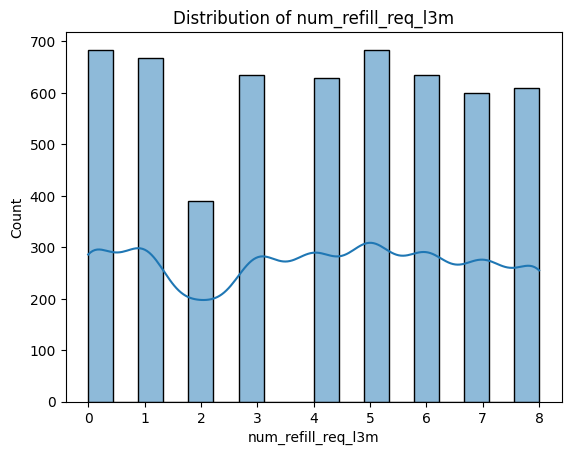

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


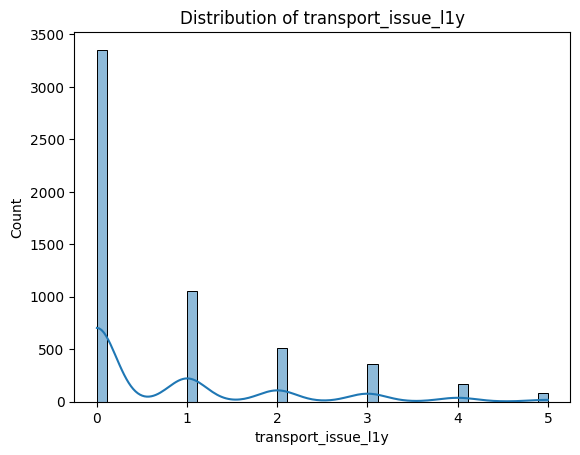

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


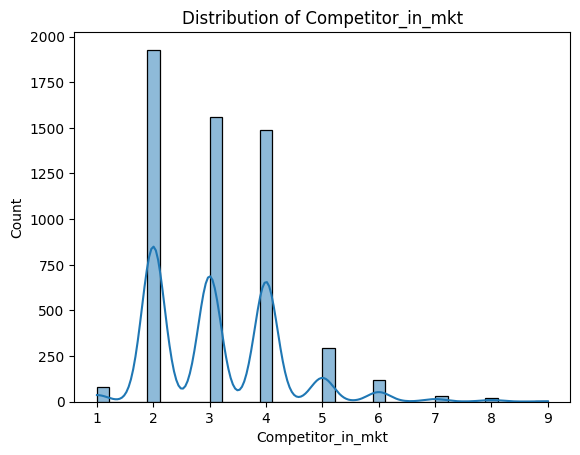

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


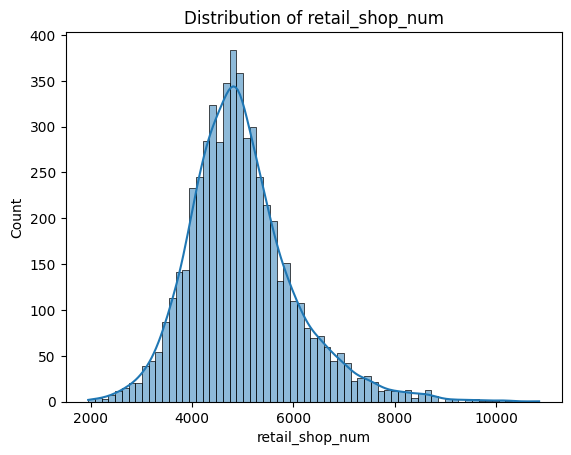

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


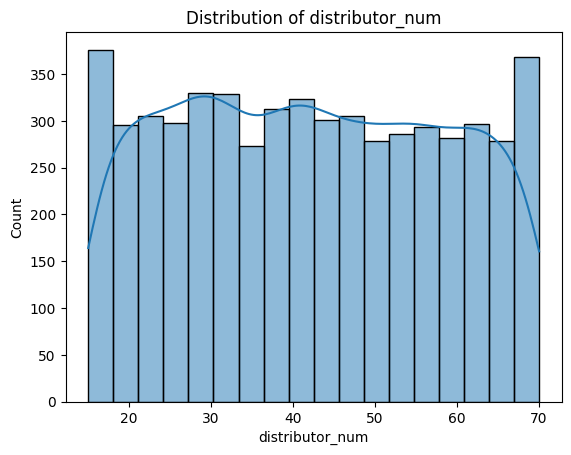

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


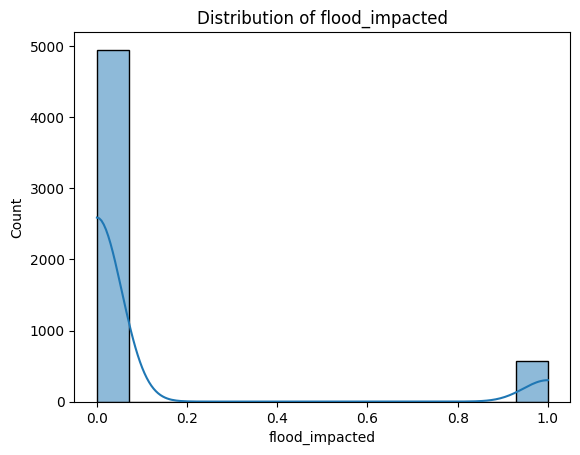

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


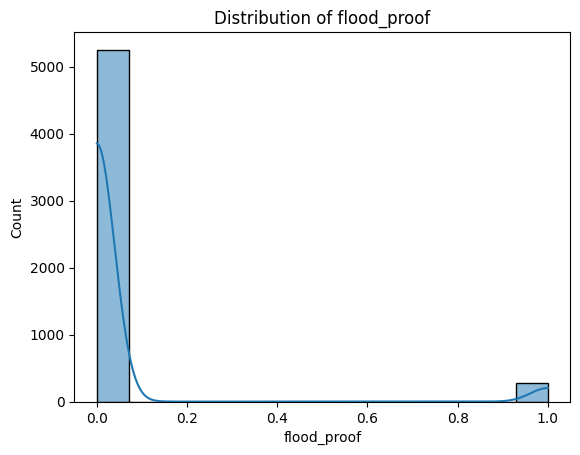

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


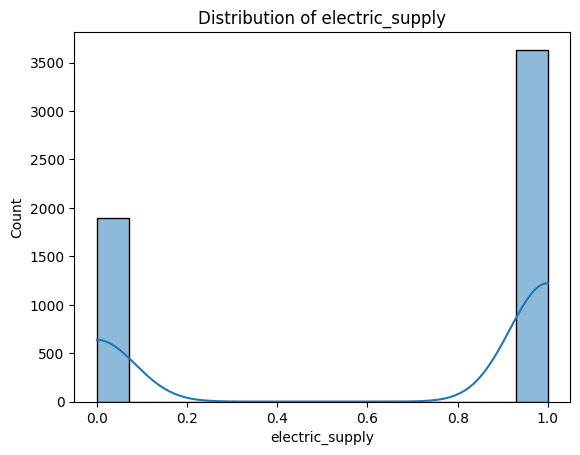

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


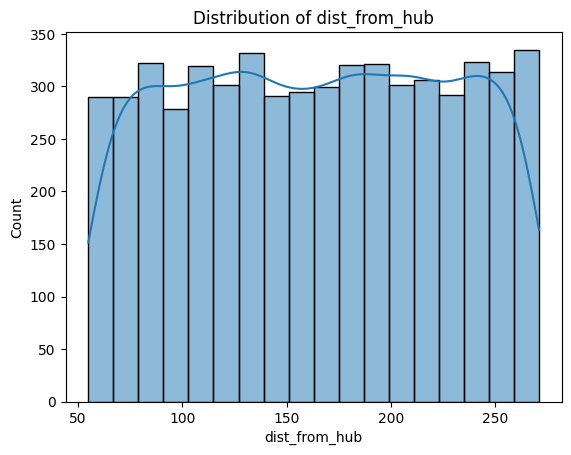

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


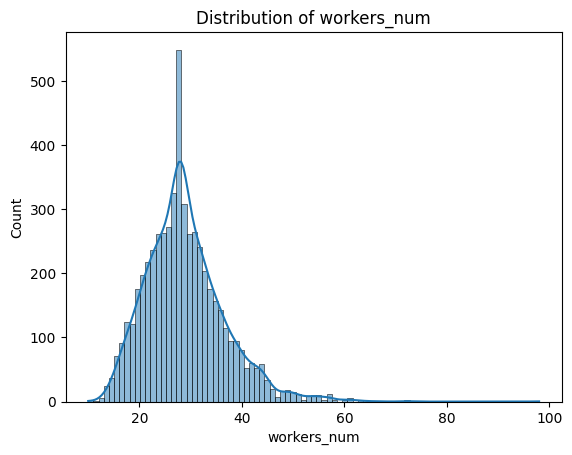

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


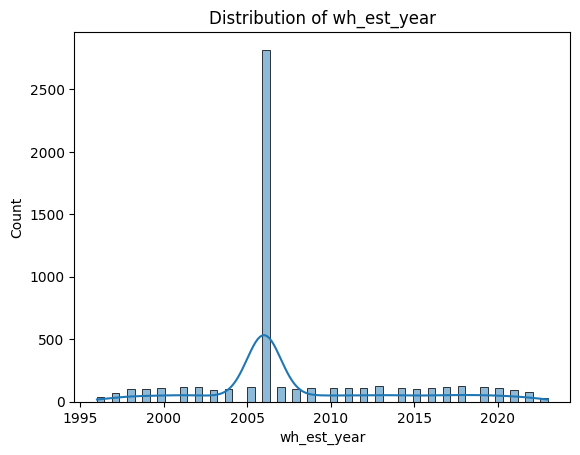

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


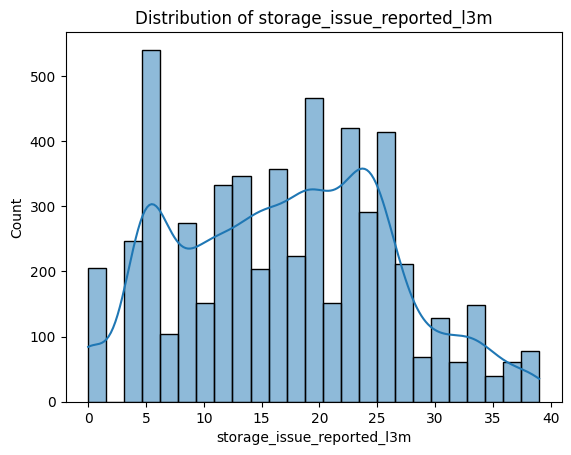

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


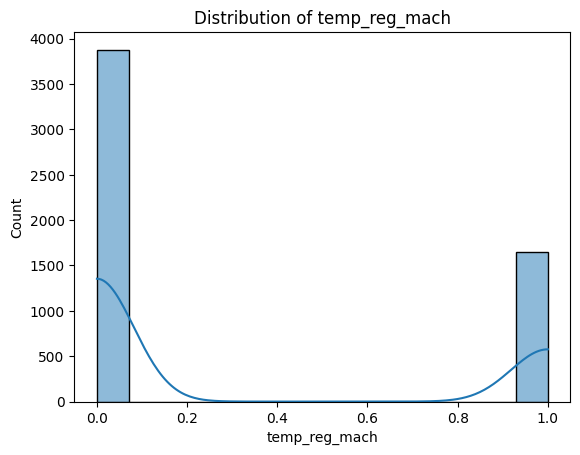

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


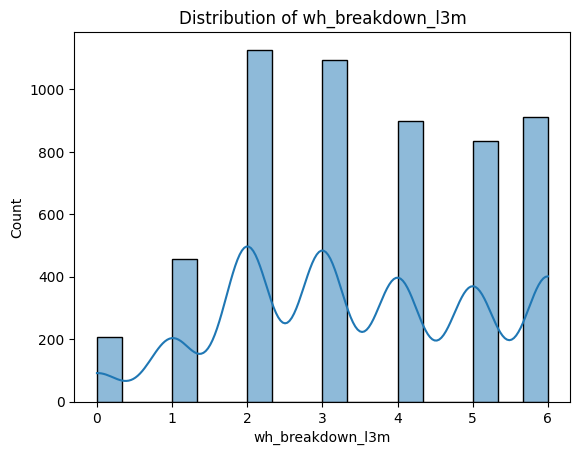

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


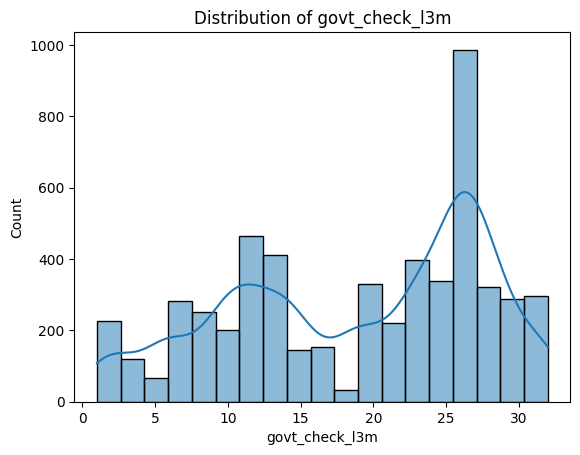

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


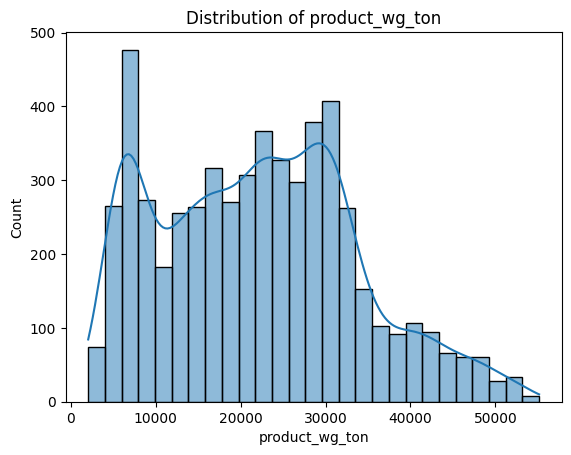

In [14]:
# Distribution of numerical features using histograms
for  column in data[numerical_cols]:
    sns.histplot(data, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

### Outlier detection and removel  of test dataset

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'Product weight')

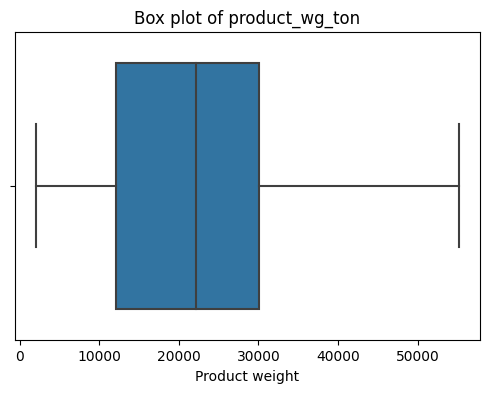

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data,x='product_wg_ton')
plt.title('Box plot of product_wg_ton')
plt.xlabel('Product weight')

In [16]:
# No outliers Found for 'product_wg_ton'

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


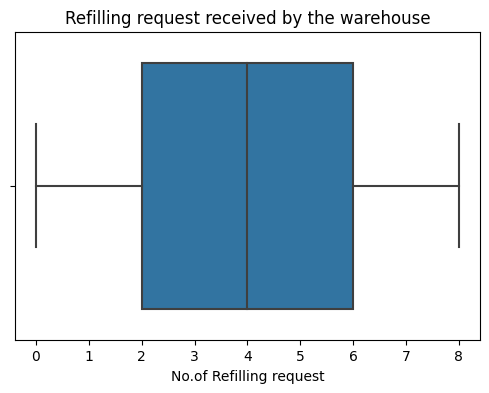

In [17]:
# Box plot
plt.figure(figsize=(6,4))
sns.boxplot(data=data,x='num_refill_req_l3m')
plt.title('Refilling request received by the warehouse')
plt.xlabel('No.of Refilling request')
plt.show()

In [18]:
# No outliers Found for 'num_refill_req_l3m'

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'No.of transport issued')

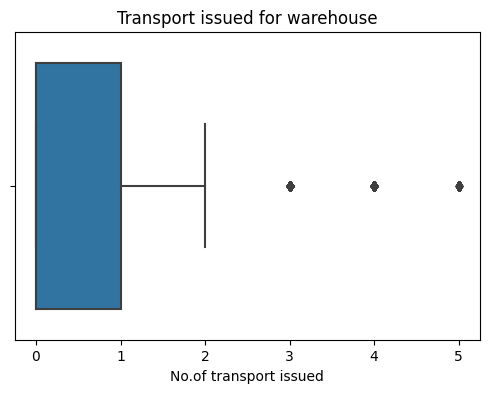

In [19]:
# Box plot
plt.figure(figsize=(6,4))
sns.boxplot(data=data,x='transport_issue_l1y')
plt.title('Transport issued for warehouse')
plt.xlabel('No.of transport issued')

In [20]:
# outliers exist for the column 'transport_issue_l1y'

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'No.of transport issued')

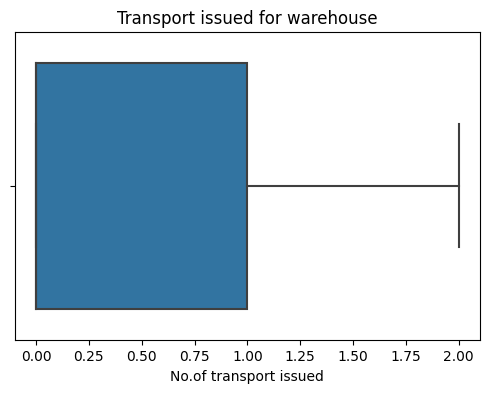

In [21]:
# Interquatile method
q1=data.transport_issue_l1y.quantile(0.25)
q3=data.transport_issue_l1y.quantile(0.75)
iqr=q3-q1
min=q1-1.5*iqr
max=q3+1.5*iqr
df1=data[(data.transport_issue_l1y>min)&(data.transport_issue_l1y<max)]
plt.figure(figsize=(6,4))
sns.boxplot(data=df1,x='transport_issue_l1y')
plt.title('Transport issued for warehouse')
plt.xlabel('No.of transport issued')

In [22]:
# outliers removed

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'No. of competitors in the market')

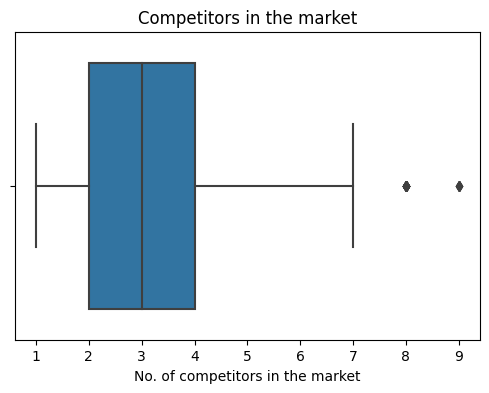

In [23]:
# Box plot
plt.figure(figsize=(6,4))
sns.boxplot(data=data,x ='Competitor_in_mkt')
plt.title('Competitors in the market')
plt.xlabel('No. of competitors in the market')

In [24]:
# Outliers exist for number of competitors in the market

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'No. of competitors in the market')

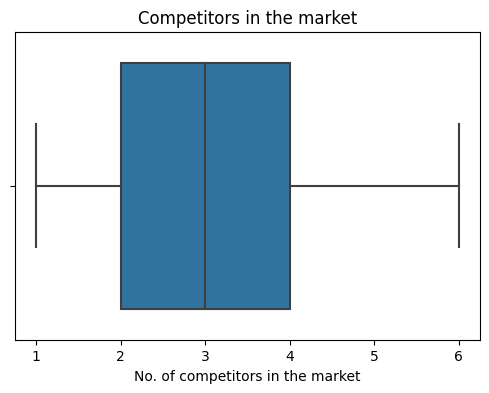

In [25]:
# Normal distribution method
m=data.Competitor_in_mkt.mean()
s=data.Competitor_in_mkt.std()
min=m-3*s
max=m+3*s
df1=data[(data.Competitor_in_mkt>min)&(data.Competitor_in_mkt<max)]
plt.figure(figsize=(6,4))
sns.boxplot(data=df1,x ='Competitor_in_mkt')
plt.title('Competitors in the market')
plt.xlabel('No. of competitors in the market')

In [26]:
# Outliers removed

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='retail_shop_num', ylabel='Count'>

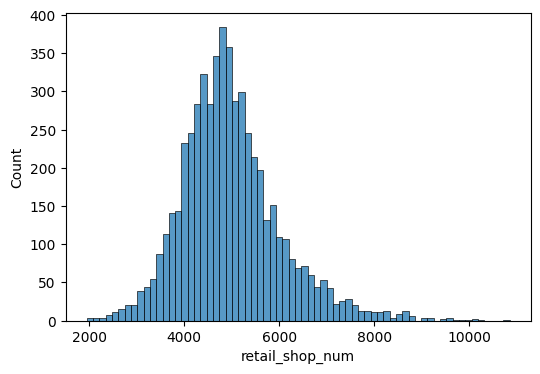

In [27]:
# Histogram plot
plt.figure(figsize=(6,4))
sns.histplot(data=data,x='retail_shop_num')

In [28]:
# Outliers exist

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='retail_shop_num', ylabel='Count'>

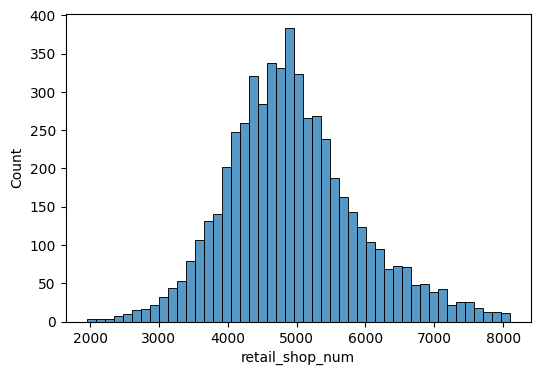

In [29]:
# Normal distribution method
m=data.retail_shop_num.mean()
s=data.retail_shop_num.std()
min=m-3*s
max=m+3*s
df1=data[(data.retail_shop_num>min)&(data.retail_shop_num<max)]
plt.figure(figsize=(6,4))
sns.histplot(data=df1,x='retail_shop_num')

In [30]:
# Outliers removed

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'The number of workers in the warehouse')

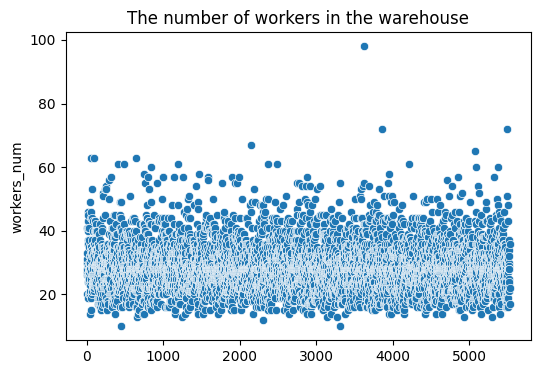

In [31]:
# Scatterplot for 'workers_num'
plt.figure(figsize=(6,4))
sns.scatterplot(data=data['workers_num'])
plt.title('The number of workers in the warehouse')

In [32]:
# Outliers exist

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'The number of workers in the warehouse')

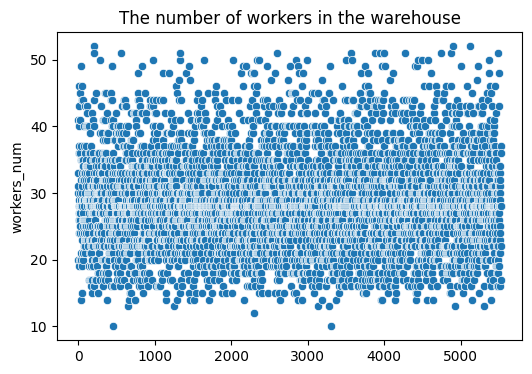

In [33]:
# zscore method
data['zscore']=(data.workers_num-data.workers_num.mean())/data.workers_num.std()
df1=data[(data.zscore>-3)&(data.zscore<3)]
plt.figure(figsize=(6,4))
sns.scatterplot(data=df1['workers_num'])
plt.title('The number of workers in the warehouse')

In [34]:
data.drop(columns=['zscore'],inplace=True)

In [35]:
# Outliers removed

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'warehouse establishment year')

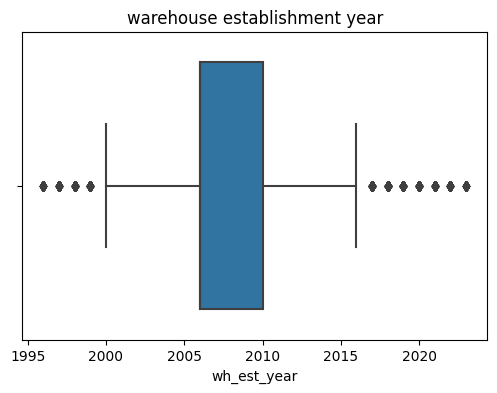

In [36]:
# Box plot
plt.figure(figsize=(6,4))
sns.boxplot(data=data,x='wh_est_year')
plt.title('warehouse establishment year')

In [37]:
# Outliers exist for number of workers in the warehouse

In [38]:
# percentile method is used to remove the outlayers
data.wh_est_year.quantile(0.1)

2002.0

In [39]:
data.wh_est_year.quantile(0.80)

2013.0

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='wh_est_year'>

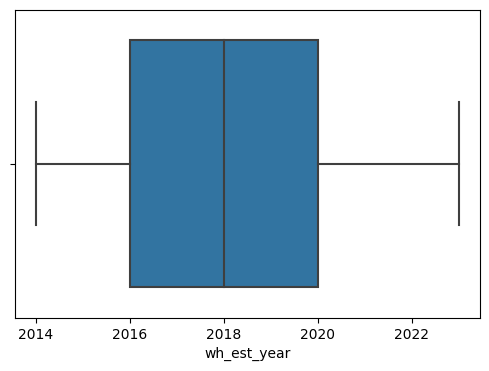

In [40]:
df1=data[(data.wh_est_year.quantile(0.1)<data.wh_est_year)&(data.wh_est_year.quantile(0.80)<data.wh_est_year)]
plt.figure(figsize=(6,4))
sns.boxplot(data=df1,x='wh_est_year')

In [41]:
# Outliers removed

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='dist_from_hub'>

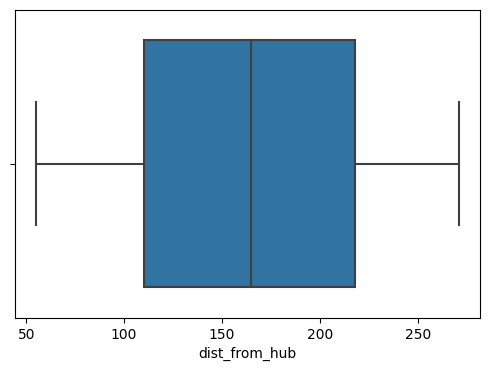

In [42]:
# box plot
plt.figure(figsize=(6,4))
sns.boxplot(data=data,x='dist_from_hub')


In [43]:
# No outlier exist for 'dist_from_hub'

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='distributor_num'>

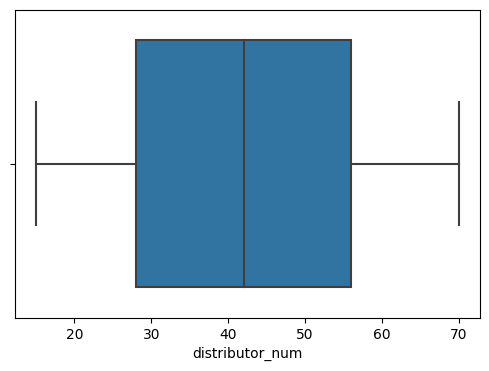

In [44]:
# Box plot
plt.figure(figsize=(6,4))
sns.boxplot(data=data,x='distributor_num')

In [45]:
# No outlier for'distributor_num'

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='retail_shop_num'>

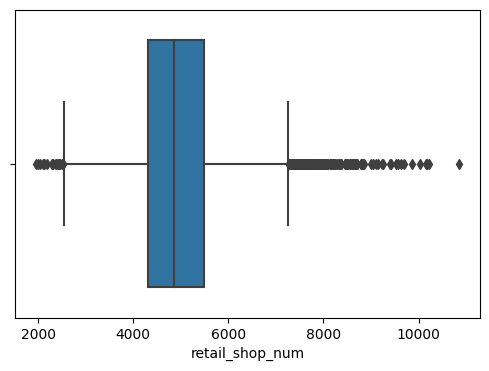

In [46]:
# box plot
plt.figure(figsize=(6,4))
sns.boxplot(data=data,x='retail_shop_num')

In [47]:
# Outliers exist

In [48]:
# percentile method is used to remove the outlayers
data.retail_shop_num.quantile(0.1)

3804.6000000000004

In [49]:
data.retail_shop_num.quantile(0.95)

6920.599999999997

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='retail_shop_num'>

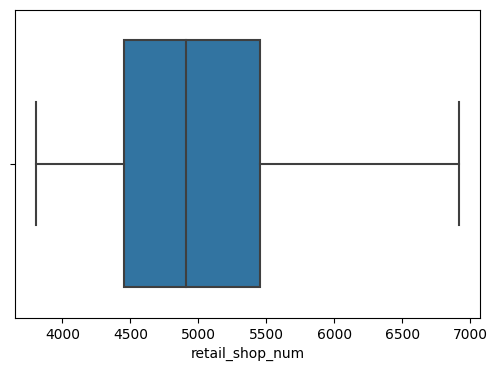

In [50]:
df1=data[(data.retail_shop_num.quantile(0.1)<data.retail_shop_num)&(data.retail_shop_num.quantile(0.95)>data.retail_shop_num)]
plt.figure(figsize=(6,4))
sns.boxplot(data=df1,x='retail_shop_num')

In [51]:
# Outliers removed

### All the outliers are removed using Box plot, Scatter plot and Histplot

In [52]:
data=df1
data

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,5590,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,5856,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,4803,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,4784,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
5,WH_116626,EID_66626,Rural,Small,North,Zone 1,1,0,2,5502,...,1,240,26.0,2006.0,14,1,B,2,31,19127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5522,WH_122143,EID_72143,Rural,Large,West,Zone 5,1,0,2,5415,...,1,231,32.0,2006.0,0,0,NaN,0,24,3133
5524,WH_122145,EID_72145,Rural,Large,North,Zone 6,8,1,3,5030,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
5525,WH_122146,EID_72146,Rural,Small,South,Zone 6,3,1,3,4320,...,0,170,28.0,2006.0,26,0,C,5,9,33108
5526,WH_122147,EID_72147,Rural,Large,North,Zone 6,7,2,2,5268,...,0,99,22.0,2006.0,20,0,B+,6,4,24072


In [53]:
# New relevant features
data['transport_issue_l3m_equivalent'] = data['transport_issue_l1y'] / 4
demand = data['num_refill_req_l3m']
supply = data['transport_issue_l3m_equivalent']
data['Demand_Supply_Gap'] = demand - supply
data

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,transport_issue_l3m_equivalent,Demand_Supply_Gap
0,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,5590,...,30.0,2006.0,24,0,A,2,5,30132,0.00,5.00
1,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,5856,...,31.0,2019.0,5,1,C,2,24,6075,0.00,5.00
2,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,4803,...,41.0,2008.0,19,1,A+,5,9,24076,0.00,3.00
3,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,4784,...,33.0,2017.0,9,1,A+,3,11,13092,0.50,4.50
5,WH_116626,EID_66626,Rural,Small,North,Zone 1,1,0,2,5502,...,26.0,2006.0,14,1,B,2,31,19127,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5522,WH_122143,EID_72143,Rural,Large,West,Zone 5,1,0,2,5415,...,32.0,2006.0,0,0,NaN,0,24,3133,0.00,1.00
5524,WH_122145,EID_72145,Rural,Large,North,Zone 6,8,1,3,5030,...,28.0,2007.0,22,1,A+,2,4,29138,0.25,7.75
5525,WH_122146,EID_72146,Rural,Small,South,Zone 6,3,1,3,4320,...,28.0,2006.0,26,0,C,5,9,33108,0.25,2.75
5526,WH_122147,EID_72147,Rural,Large,North,Zone 6,7,2,2,5268,...,22.0,2006.0,20,0,B+,6,4,24072,0.50,6.50


In [54]:
data.isna().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                         0
wh_est_year                         0
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      174
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
transport_issue_l3m_equivalent      0
Demand_Supply_Gap                   0
dtype: int64

#### Predicting the missing 'approved_wh_govt_certificate ' values 

In [55]:
# Split data into known and missing 'approved_wh_govt_certificate' values
known_data = data[data['approved_wh_govt_certificate'].notnull()]
missing_data = data[data['approved_wh_govt_certificate'].isnull()]

In [56]:
categorical_cols = known_data.select_dtypes(include=['object']).columns
categorical_cols

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

In [57]:
# Label Encoding the categorical columns of Known data
le = preprocessing.LabelEncoder()
encoded_known_data= known_data
encoded_known_data['Ware_house_ID'] = le.fit_transform(encoded_known_data['Ware_house_ID'])
encoded_known_data['WH_Manager_ID'] = le.fit_transform(known_data['WH_Manager_ID'])
encoded_known_data['Location_type'] = le.fit_transform(known_data['Location_type'])
encoded_known_data['WH_capacity_size'] = le.fit_transform(known_data['WH_capacity_size'])
encoded_known_data['zone'] = le.fit_transform(known_data['zone'])
encoded_known_data['WH_regional_zone'] = le.fit_transform(known_data['WH_regional_zone'])
encoded_known_data['wh_owner_type'] = le.fit_transform(known_data['wh_owner_type'])
encoded_known_data['approved_wh_govt_certificate']= le.fit_transform(known_data['approved_wh_govt_certificate'])
encoded_known_data

C:\Users\hp\AppData\Local\Temp\ipykernel_5864\2776742746.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_known_data['Ware_house_ID'] = le.fit_transform(encoded_known_data['Ware_house_ID'])
C:\Users\hp\AppData\Local\Temp\ipykernel_5864\2776742746.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_known_data['WH_Manager_ID'] = le.fit_transform(known_data['WH_Manager_ID'])
C:\Users\hp\AppData\Local\Temp\ipykernel_5864\2776742746.py:6: SettingWithCopyWarning: 
A value is trying to be set on

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,transport_issue_l3m_equivalent,Demand_Supply_Gap
0,0,0,0,0,1,4,5,0,3,5590,...,30.0,2006.0,24,0,0,2,5,30132,0.00,5.00
1,1,1,0,0,1,4,5,0,2,5856,...,31.0,2019.0,5,1,4,2,24,6075,0.00,5.00
2,2,2,0,2,1,5,3,0,3,4803,...,41.0,2008.0,19,1,1,5,9,24076,0.00,3.00
3,3,3,0,1,3,3,5,2,2,4784,...,33.0,2017.0,9,1,1,3,11,13092,0.50,4.50
5,4,4,0,2,1,0,1,0,2,5502,...,26.0,2006.0,14,1,2,2,31,19127,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5521,4520,4520,0,0,1,5,5,0,2,6080,...,29.0,1998.0,34,0,4,2,28,46138,0.00,5.00
5524,4521,4521,0,0,1,5,8,1,3,5030,...,28.0,2007.0,22,1,1,2,4,29138,0.25,7.75
5525,4522,4522,0,2,2,5,3,1,3,4320,...,28.0,2006.0,26,0,4,5,9,33108,0.25,2.75
5526,4523,4523,0,0,1,5,7,2,2,5268,...,22.0,2006.0,20,0,3,6,4,24072,0.50,6.50


In [58]:
missing_features = missing_data.drop(columns=['approved_wh_govt_certificate'])
missing_features

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,transport_issue_l3m_equivalent,Demand_Supply_Gap
32,WH_116653,EID_66653,Rural,Mid,West,Zone 4,4,0,3,6230,...,230,28.0,2022.0,0,0,0,26,6087,0.00,4.00
78,WH_116699,EID_66699,Rural,Large,South,Zone 5,0,3,3,5969,...,228,26.0,2006.0,0,0,0,25,2104,0.75,-0.75
92,WH_116713,EID_66713,Rural,Mid,North,Zone 3,5,1,3,4064,...,247,36.0,2022.0,0,0,0,27,6100,0.25,4.75
116,WH_116737,EID_66737,Rural,Large,West,Zone 6,0,0,3,4648,...,139,29.0,2006.0,0,0,0,23,4114,0.00,0.00
237,WH_116858,EID_66858,Rural,Large,South,Zone 5,7,1,4,4823,...,105,32.0,2006.0,0,0,0,25,3150,0.25,6.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,WH_122027,EID_72027,Rural,Mid,West,Zone 4,8,1,2,4969,...,107,29.0,2022.0,0,0,0,26,7064,0.25,7.75
5442,WH_122063,EID_72063,Rural,Mid,West,Zone 4,6,0,4,6436,...,56,41.0,2022.0,0,0,0,26,5126,0.00,6.00
5447,WH_122068,EID_72068,Rural,Mid,West,Zone 4,5,0,5,6446,...,163,24.0,2021.0,0,0,0,26,13074,0.00,5.00
5453,WH_122074,EID_72074,Rural,Large,South,Zone 6,1,0,3,4751,...,183,23.0,2006.0,0,1,0,29,6113,0.00,1.00


In [59]:
le2 = preprocessing.LabelEncoder()
encoded_missing_features = missing_features
encoded_missing_features['Ware_house_ID'] = le2.fit_transform(missing_features['Ware_house_ID'])
encoded_missing_features['WH_Manager_ID'] = le2.fit_transform(missing_features['WH_Manager_ID'])
encoded_missing_features['Location_type'] = le2.fit_transform(missing_features['Location_type'])
encoded_missing_features['WH_capacity_size'] = le2.fit_transform(missing_features['WH_capacity_size'])
encoded_missing_features['zone'] = le2.fit_transform(missing_features['zone'])
encoded_missing_features['WH_regional_zone'] = le2.fit_transform(missing_features['WH_regional_zone'])
encoded_missing_features['wh_owner_type'] = le2.fit_transform(missing_features['wh_owner_type'])
encoded_missing_features

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,transport_issue_l3m_equivalent,Demand_Supply_Gap
32,0,0,0,1,3,3,4,0,3,6230,...,230,28.0,2022.0,0,0,0,26,6087,0.00,4.00
78,1,1,0,0,2,4,0,3,3,5969,...,228,26.0,2006.0,0,0,0,25,2104,0.75,-0.75
92,2,2,0,1,1,2,5,1,3,4064,...,247,36.0,2022.0,0,0,0,27,6100,0.25,4.75
116,3,3,0,0,3,5,0,0,3,4648,...,139,29.0,2006.0,0,0,0,23,4114,0.00,0.00
237,4,4,0,0,2,4,7,1,4,4823,...,105,32.0,2006.0,0,0,0,25,3150,0.25,6.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,169,169,0,1,3,3,8,1,2,4969,...,107,29.0,2022.0,0,0,0,26,7064,0.25,7.75
5442,170,170,0,1,3,3,6,0,4,6436,...,56,41.0,2022.0,0,0,0,26,5126,0.00,6.00
5447,171,171,0,1,3,3,5,0,5,6446,...,163,24.0,2021.0,0,0,0,26,13074,0.00,5.00
5453,172,172,0,0,2,5,1,0,3,4751,...,183,23.0,2006.0,0,1,0,29,6113,0.00,1.00


###  All the categorical columns are Encoded successfully

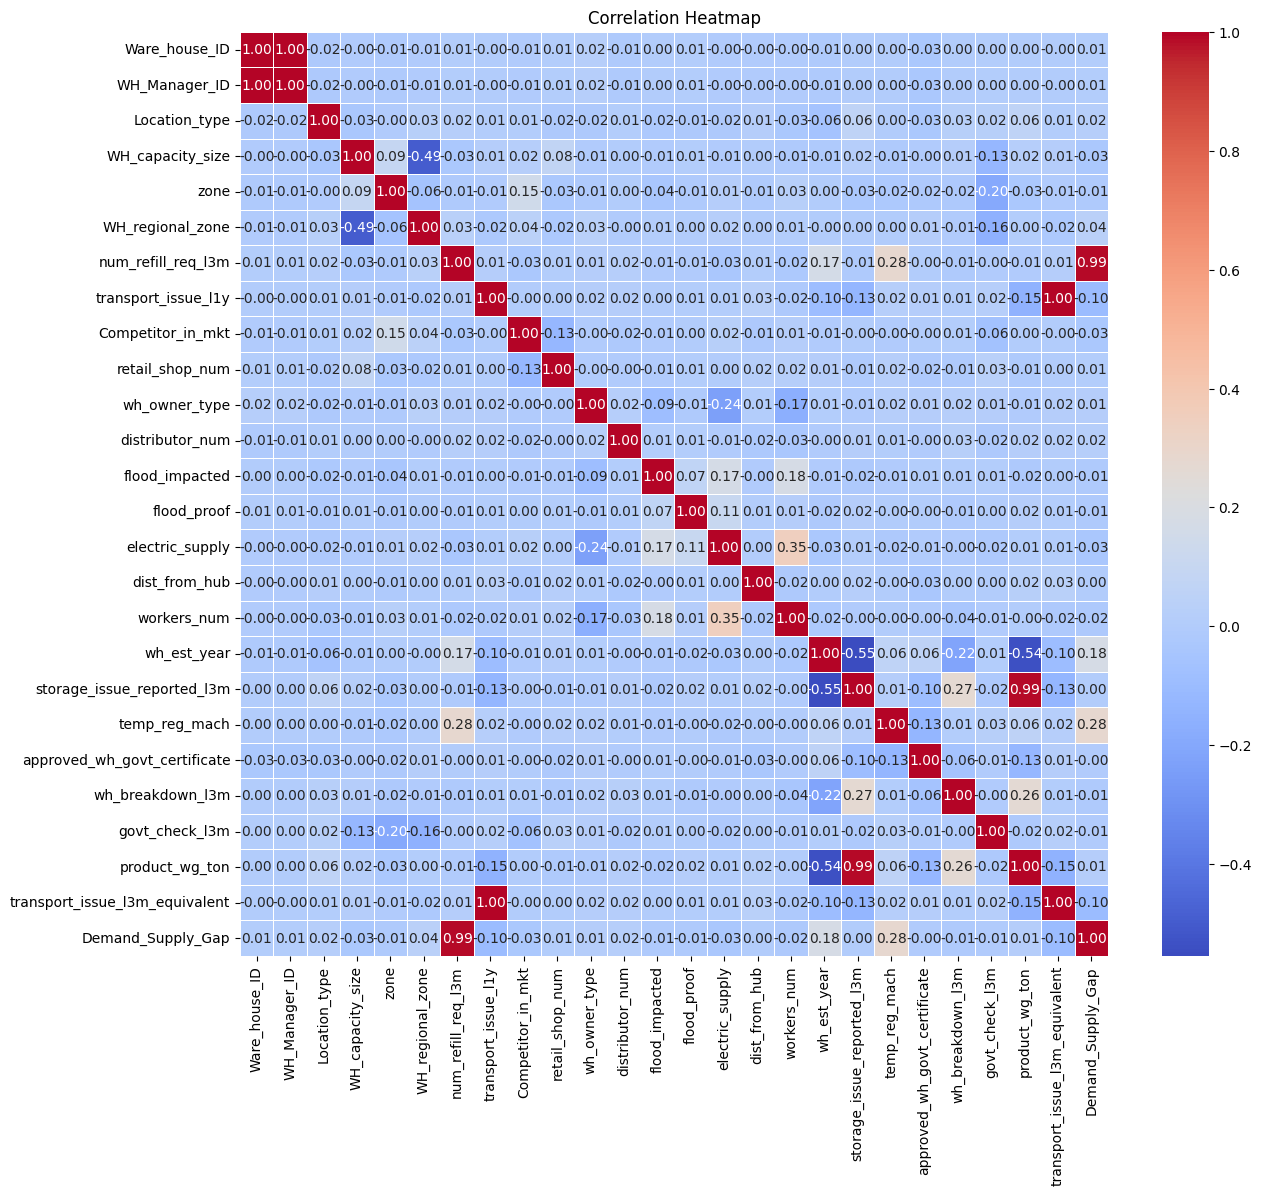

In [60]:
# plot a heatmap to show the correlation among variables.
correlation_matrix = encoded_known_data.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### The independent variables that affects 'approved_wh_govt_certificate' are,
#### wh_est_year , storage_issue_reported_l3m , temp_reg_mach , wh_breakdon_13m , product_wg_ton

In [61]:
# Split the known data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(encoded_known_data[['wh_est_year','storage_issue_reported_l3m','temp_reg_mach','wh_breakdown_l3m','product_wg_ton']], encoded_known_data['approved_wh_govt_certificate'] , test_size=0.2, random_state=42)

In [62]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
# Predicted  missing values for 'approved_wh_govt_certificate'

predicted_values = classifier.predict(encoded_missing_features[['wh_est_year','storage_issue_reported_l3m','temp_reg_mach','wh_breakdown_l3m','product_wg_ton']])
predicted_values

array([4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 2, 3, 2, 2, 2, 4, 4, 4, 2, 3,
       4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4,
       3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 4, 2, 4, 3, 4, 2, 2, 4, 2,
       2, 4, 3, 4, 0, 4, 4, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 4,
       4, 4, 2, 2, 3, 2, 4, 3, 2, 4, 4, 4, 3, 4, 2, 4, 4, 2, 0, 2, 4, 2,
       4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 3, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 3, 2, 4, 4, 4, 4,
       2, 4, 2, 4, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 2])

In [64]:
encoded_missing_features['approved_wh_govt_certificate'] = predicted_values
encoded_missing_features

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,transport_issue_l3m_equivalent,Demand_Supply_Gap,approved_wh_govt_certificate
32,0,0,0,1,3,3,4,0,3,6230,...,28.0,2022.0,0,0,0,26,6087,0.00,4.00,4
78,1,1,0,0,2,4,0,3,3,5969,...,26.0,2006.0,0,0,0,25,2104,0.75,-0.75,2
92,2,2,0,1,1,2,5,1,3,4064,...,36.0,2022.0,0,0,0,27,6100,0.25,4.75,4
116,3,3,0,0,3,5,0,0,3,4648,...,29.0,2006.0,0,0,0,23,4114,0.00,0.00,2
237,4,4,0,0,2,4,7,1,4,4823,...,32.0,2006.0,0,0,0,25,3150,0.25,6.75,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,169,169,0,1,3,3,8,1,2,4969,...,29.0,2022.0,0,0,0,26,7064,0.25,7.75,4
5442,170,170,0,1,3,3,6,0,4,6436,...,41.0,2022.0,0,0,0,26,5126,0.00,6.00,2
5447,171,171,0,1,3,3,5,0,5,6446,...,24.0,2021.0,0,0,0,26,13074,0.00,5.00,4
5453,172,172,0,0,2,5,1,0,3,4751,...,23.0,2006.0,0,1,0,29,6113,0.00,1.00,4


In [65]:
data_encoded = pd.concat([encoded_known_data, encoded_missing_features])
data_encoded

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,transport_issue_l3m_equivalent,Demand_Supply_Gap
0,0,0,0,0,1,4,5,0,3,5590,...,30.0,2006.0,24,0,0,2,5,30132,0.00,5.00
1,1,1,0,0,1,4,5,0,2,5856,...,31.0,2019.0,5,1,4,2,24,6075,0.00,5.00
2,2,2,0,2,1,5,3,0,3,4803,...,41.0,2008.0,19,1,1,5,9,24076,0.00,3.00
3,3,3,0,1,3,3,5,2,2,4784,...,33.0,2017.0,9,1,1,3,11,13092,0.50,4.50
5,4,4,0,2,1,0,1,0,2,5502,...,26.0,2006.0,14,1,2,2,31,19127,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,169,169,0,1,3,3,8,1,2,4969,...,29.0,2022.0,0,0,4,0,26,7064,0.25,7.75
5442,170,170,0,1,3,3,6,0,4,6436,...,41.0,2022.0,0,0,2,0,26,5126,0.00,6.00
5447,171,171,0,1,3,3,5,0,5,6446,...,24.0,2021.0,0,0,4,0,26,13074,0.00,5.00
5453,172,172,0,0,2,5,1,0,3,4751,...,23.0,2006.0,0,1,4,0,29,6113,0.00,1.00


In [66]:
data.isna().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                         0
wh_est_year                         0
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      174
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
transport_issue_l3m_equivalent      0
Demand_Supply_Gap                   0
dtype: int64

In [67]:
data.dtypes

Ware_house_ID                      object
WH_Manager_ID                      object
Location_type                      object
WH_capacity_size                   object
zone                               object
WH_regional_zone                   object
num_refill_req_l3m                  int64
transport_issue_l1y                 int64
Competitor_in_mkt                   int64
retail_shop_num                     int64
wh_owner_type                      object
distributor_num                     int64
flood_impacted                      int64
flood_proof                         int64
electric_supply                     int64
dist_from_hub                       int64
workers_num                       float64
wh_est_year                       float64
storage_issue_reported_l3m          int64
temp_reg_mach                       int64
approved_wh_govt_certificate       object
wh_breakdown_l3m                    int64
govt_check_l3m                      int64
product_wg_ton                    

In [68]:
numerical_cols=data.select_dtypes(include=['int64','float64']).columns
numerical_cols

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton', 'transport_issue_l3m_equivalent',
       'Demand_Supply_Gap'],
      dtype='object')

### Standard Scaling the numerical columns

In [69]:
scaler = StandardScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

In [70]:
data_encoded

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,transport_issue_l3m_equivalent,Demand_Supply_Gap
0,0,0,0,0,1,4,0.376796,-0.638786,-0.068450,0.817139,...,0.14199,-0.330009,0.747568,-0.653758,0,-0.869041,-1.602937,0.691709,-0.638786,0.447891
1,1,1,0,0,1,4,0.376796,-0.638786,-0.987442,1.189886,...,0.27233,1.969177,-1.321103,1.529618,4,-0.869041,0.573669,-1.381360,-0.638786,0.447891
2,2,2,0,2,1,5,-0.394020,-0.638786,-0.068450,-0.285687,...,1.57573,0.023712,0.203181,1.529618,1,0.893420,-1.144704,0.169844,-0.638786,-0.318408
3,3,3,0,1,3,3,0.376796,1.030655,-0.987442,-0.312312,...,0.53301,1.615456,-0.885593,1.529618,1,-0.281554,-0.915588,-0.776683,1.030655,0.256316
5,4,4,0,2,1,0,-1.164837,-0.638786,-0.987442,0.693824,...,-0.37937,-0.330009,-0.341206,1.529618,2,-0.869041,1.375576,-0.256627,-0.638786,-1.084706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,169,169,0,1,3,3,1.533022,0.195935,-0.987442,-0.053071,...,0.01165,2.499759,-1.865490,-0.653758,4,-2.044015,0.802785,-1.296135,0.195935,1.501551
5442,170,170,0,1,3,3,0.762205,-0.638786,0.850542,2.002642,...,1.57573,2.499759,-1.865490,-0.653758,2,-2.044015,0.802785,-1.463139,-0.638786,0.831040
5447,171,171,0,1,3,3,0.376796,-0.638786,1.769534,2.016655,...,-0.64005,2.322898,-1.865490,-0.653758,4,-2.044015,0.802785,-0.778234,-0.638786,0.447891
5453,172,172,0,0,2,5,-1.164837,-0.638786,-0.068450,-0.358555,...,-0.77039,-0.330009,-1.865490,1.529618,4,-2.044015,1.146460,-1.378086,-0.638786,-1.084706


In [71]:
data_encoded.to_csv('supply_test_preprocessed.csv',index=False)

###  Test data preprocessed and stored